Numpy &nbsp;&nbsp;&nbsp;&nbsp;: Numerical library used for manipulating vectors like dot product, vector product, sum etc
<br>
Matplotlib : 2D Ploting library to visulize graphs
             Here used to plot image of number with 28x28 dimensional pixel values
<br>
Pandas &nbsp;&nbsp;&nbsp;: Used for working with tables efficiently
             Here used to read .csv file of mnist database
<br>


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

<pre>
Applies activation function after output from every layer
To find derivative of activators, include "derivative=True" in argument
</pre>

In [2]:
class activator:

    def sigmoid(z, derivative=False):
        if derivative==True:
            return (activator.sigmoid(z=z, derivative=False) * (1 - activator.sigmoid(z=z, derivative=False)))
        return (1.0 / (1.0 + np.exp(-z)))

    def softmax(z, derivative=False):
        if derivative==True:
            return (activator.softmax(z=z, derivative=False) * (1 - activator.softmax(z=z, derivative=False)))
        return (np.exp(z) / np.sum(np.exp(z)))

    def tanh(z, derivative=False):
        if derivative==True:
            return (activator.tanh(z=z, derivative=False) * (1 - activator.tanh(z=z, derivative=False)))
        return (np.tanh(z))

    def relu(z, derivative=False):
        if derivative==True:
            return (float(z>0))
        return (np.maximum(z, 0))


<pre>

                              O
                              O
                              O
        O                     O
        O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     |
        O                     O                     |
        |                     O                     |
        |                     O                     |
        |                     O                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
      Input                Hidden                Output
      Layer                Layer                  Layer
 (inp_size, no_inp)  (hid_size, inp_size)  (out_size, hid_size)
    (784, 1000)          (1500, 784)            (10, 1500)
</pre>

<pre>
Network : A class which creates a network as given above and initialize weights and biases randomly
          Further, netowrk is trained my method gradient descent, grad_descn
</pre>

In [3]:
class network(object):

#   error : List of errors predicted after iterating over all epochs for ploting error vs epochs graph
#   error.append(train_error)
    error = []

    def __init__(self, size):
        self.num_layers = len(size)
#       Initialize biases randomly        
        self.biases  = [np.zeros([y, 1]) for y in size[1:]]
#       Initialize weights randomly    
        self.weights = [np.random.randn(y, x)*0.01 for x, y in zip(size[:-1], size[1:])]

#   Iterates forward to generate results predicted by network
    def train_feed_forward(self, size, input, activators, mini_batch_size):
#       $self.z : List of numpy array of outputs of every neuron
        self.z = [np.zeros([y, mini_batch_size]) for y in size[:]]
#       i : Used as index for using actiator function from list "activators"
        i=0
#       $self.z[0] : Same as input values
        self.z[0] = input
#       Total iteration of loop is same as number of layers present in model
        for bias, weight in zip(self.biases, self.weights):
#           input : Placeholder to calculate prediction by model and self.z
#             y   =     m   *   x   +  c
#           input = (weight * input) + bias
            input = (np.dot(weight, input) + bias)
            self.z[i+1] = input
#           input = activator(input)
            if(activators[i]=="sigmoid"):
                input = activator.sigmoid(z=input, derivative=False)
            elif(activators[i]=="softmax"):
                input = activator.softmax(z=input, derivative=False)
            elif(activators[i]=="tanh"):
                input = activator.tanh(z=input, derivative=False)
            elif(activators[i]=="relu"):
                input = activator.relu(z=input, derivative=False)
            i=i+1
#       returns output from last layer
        return input
 
    
#   Mean squared error
#   (predicted - expected)**2
    def loss(self, Y, Y_hat, derivative=False):
        if derivative==True:
            return (Y_hat-Y)
        return ((Y_hat - Y) ** 2)
    

#   Implementation of Gradient Descent Algorithm
    def grad_descn(self, size, expected_value, training_data, activators, alpha, mini_batch_size, drop_prob, epochs):
#       Result : Numpy Array of One Hot Encoded expected value
#                Just like demultiplexers
#
#                0   1   2   3   4   5   6   7   8   9
#
#                1   0   0   0   0   0   0   0   0   0
#                0   1   0   0   0   0   0   0   0   0
#                0   0   1   0   0   0   0   0   0   0
#                0   0   0   1   0   0   0   0   0   0
#                0   0   0   0   1   0   0   0   0   0
#                0   0   0   0   0   1   0   0   0   0
#                0   0   0   0   0   0   1   0   0   0
#                0   0   0   0   0   0   0   1   0   0
#                0   0   0   0   0   0   0   0   1   0
#                0   0   0   0   0   0   0   0   0   1
#
        result = np.zeros([size[-1], len(training_data.T)])
        for i in range(len(training_data)):
            result[expected_value[0, i], i]=True

#       Training the network for $epochs number of times
#       Iterates again and again through the same data
        for epoch_no in range(epochs):
            print(epoch_no)
#           $nabla_b : List of Numpy Array of Gradients of every Biases
#           $nabla_w : List of Numpy Array of Gradients of every Weights
            nabla_b = [np.zeros([y, 1]) for y in size[1:]]
            nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]
#           Splits data into mini batches for training
#           Weights and Biases updates after every iterarion over mini batch
            for k in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[:, k:k+mini_batch_size]
                y = result[:, k:k+mini_batch_size]
#               delta_nabla   : Error to be corrected in prediction
#                               List of List of Numpy Arrays of delta_nabla_b and delta_nabla_w
#                               [delta_nabla_b, delta_nabla_w]
#               delta_nabla_b : List of Numpy Arrays of Gradient of biases to be corrected
#               delta_nabla_b : List of Numpy Arrays of Gradient of weights to be corrected
                delta_nabla = self.find_nabla(size=size, activators=activators, mini_batch=mini_batch, mini_batch_size=mini_batch_size, y=y, alpha=alpha)
#               self.biases  = self.biases - (learning_rate * error)
#                              for every neurons
#               self.weights = self.weights - (learning_rate * error)
#                              for every neuron
                self.biases  = [b-((alpha/mini_batch_size)*n_b) for b, n_b in zip(self.biases, delta_nabla[0])]
                self.weights = [w-((alpha/mini_batch_size)*n_w) for w, n_w in zip(self.weights, delta_nabla[1])]

#               y_hat : Result predicted by model for current mini batch to calculate error
                y_hat = test_feed_forward(size=size, input=mini_batch, activators=activators)
#               train_error : Sum of errors of predictions of current mini batch
                train_error = np.sum((1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat))
#               print(train_error)
                self.error.append(train_error)

#   On every iteration of mini batch, control is parsed to find gradient of current mini batch and back propogation
    def find_nabla(self, size, activators, mini_batch, mini_batch_size, y, alpha):
#       y_hat : Result predicted by model for back propogation
        y_hat = self.train_feed_forward(size=size, input=mini_batch, activators=activators, mini_batch_size=mini_batch_size)
#       cost : Mean of loss over current mini batch
        cost = (1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat)
#       error : Sum of cost of outputs
#       delta_nabla_b : List of Numpy Array of error of gradient of biases  of every neurons 
#       delta_nabla_w : List of Numpy Array of error of gradient of weights of every neurons 
        delta_nabla_b = [np.zeros([y, 1]) for y in size[1:]]
        delta_nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]
#       Iteration over every elements of mini batch
#       delta : Numpy Array of Error of prediction in last layer of every elements in mini batch
        if activators[-1] == "sigmoid":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.sigmoid(z=y_hat, derivative=True)
        elif activators[-1] == "softmax":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.softmax(z=y_hat, derivative=True)
        elif activators[-1] == "tanh":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.tanh(z=y_hat, derivative=True)
        elif activators[-1] == "relu":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.relu(z=y_hat, derivative=True)
        delta_nabla_b[-1] += np.sum(delta)
        delta_nabla_w[-1] += np.dot(delta, self.z[-2].T)
#       Back Propogation Algorithm : Iteration over all the layers from back
        for layer_no in range(-1, -self.num_layers+2, -1):
#           delta : Numpy Array of Error of prediction in current layer of every elements in mini batch
            if activators[layer_no] == "sigmoid":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.sigmoid(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "softmax":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.softmax(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "tanh":    
                delta = np.dot(self.weights[layer_no].T, delta) * activator.tanh(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "relu":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.relu(z=self.z[layer_no-1], derivative=True)
            delta_nabla_b[layer_no-1] += np.sum(delta)
            delta_nabla_w[layer_no-1] += np.dot(delta, self.z[layer_no-2].T)
            drop_out = np.random.rand(delta_nabla_w[layer_no]) < drop_prob
            delta_nabla_w = np.multiply(delta_nabla_w, drop_out)
            delta_nabla_w /= drop_prob
        delta_nabla = [delta_nabla_b, delta_nabla_w]
        return delta_nabla


In [4]:
#   Feed Forward Network for test data
def test_feed_forward(size, input, activators):
       i=0
       for bias, weight in zip(mnist.biases, mnist.weights):
           input = (np.dot(weight, input) + bias)
           if activators[i]=="sigmoid":
               input = activator.sigmoid(z=input, derivative=False)
           elif activators[i]=="softmax":
               input = activator.softmax(z=input, derivative=False)
           elif activators[i]=="tanh":
               input = activator.tanh(z=input, derivative=False)
           elif activators[i]=="relu":
               input = activator.relu(z=input, derivative=False)
           i=i+1
       return input


In [ ]:
#   train_data_frame : Pandas dataframe of mnist dataset in csv file
train_data_frame = pd.read_csv('/home/pushpull/mount/intHdd/Project/ml/mnist/mnist_train.csv', header=None)

In [ ]:
#   Conversion of Pandas dataframe into numpy arrays
train_dataset = np.array(train_data_frame)

<pre>
It is good practice to first shuffle the data randomly to avoid fitting the model for some particular output
</pre>

In [ ]:
#   Shuffling the data using "random" library
np.random.shuffle(train_dataset)

train_lable = np.array([train_dataset[:, 0]])
train_data = np.array(train_dataset[:, 1:785]).T

print(train_dataset.shape)
print(train_lable.shape)
print(train_data.shape)

(60000, 785)
(1, 60000)
(784, 60000)


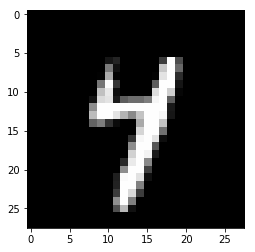

In [ ]:
plt.imshow(train_dataset[0, 1:785].reshape(28, 28), 'gray')

In [ ]:
#   neuron_layer : Dictionary of number of neurons in model and activation functions for every layer
neuron_layer = {"size_layers": [784, 2100, 10], "activations": ["tanh", "sigmoid"] }

In [ ]:
#   Initializing network with random weights and biases
mnist = network(neuron_layer["size_layers"])

In [ ]:
#   Training network using Gradient Descent Algorithm
mnist.grad_descn(size=neuron_layer["size_layers"], expected_value=train_lable, training_data=train_data, activators=neuron_layer["activations"], alpha=0.01, mini_batch_size=2000, drop_prob=0.9, epochs=40)

0
1
2
3
4
5
6
7


In [ ]:
test_data_frame = pd.read_csv('/home/pushpull/mount/intHdd/Project/ml/mnist/mnist_test.csv', header=None)

test_dataset = np.array(test_data_frame)

test_lable = np.array([test_dataset[:, 0]]).T
test_data = np.array(test_dataset[:, 1:785])

result = test_feed_forward(size=neuron_layer["size_layers"], input=test_data.T, activators=neuron_layer["activations"])

no_trues = 0

for i in range(len(test_data)):
    max_ans = result[0, i]
    max_ind = 0
    for j in range(10):
        if(result[j, i]>max_ans):
            max_ind = j
            max_ans = result[j, i]
    if(test_lable[i]==max_ind):
        no_trues+=1


In [ ]:
plt.imshow(test_dataset[22, 1:785].reshape(28, 28), 'gray')

In [ ]:
print(test_lable.shape)

In [ ]:
print(test_lable[110])

In [ ]:
print(result.shape)

In [ ]:
print(no_trues)

In [ ]:
print(100.0*(no_trues/len(test_data)))

In [ ]:
plt.imshow(test_data[91, 0:785].reshape(28, 28), 'gray')

In [ ]:
plt.plot(mnist.error)